# Book Recomendations 

**Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read dataset: 
http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [4]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [6]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [7]:
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")

In [8]:
users.columns = ['userID', 'Location', 'Age']
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [9]:
books.shape, users.shape, ratings.shape

((271360, 8), (278858, 3), (1149780, 3))

In [14]:
ratings.head(2)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5


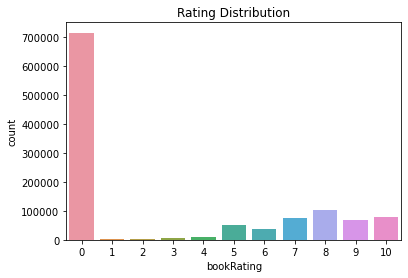

In [13]:
#plot the distribution of the bookrating
sns.countplot(x = 'bookRating', data = ratings).set_title('Rating Distribution');

In [15]:
users.head(2)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


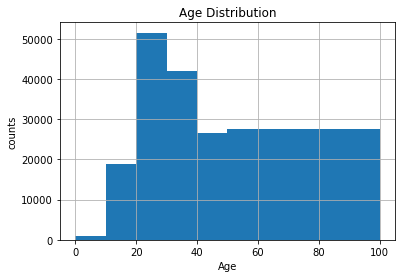

In [19]:
users['Age'].hist(bins = [0, 10, 20, 30, 40, 50, 100]).set_title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('counts')
plt.show()

## recomendations based on Ratings counts

In [23]:
ratings_counts = ratings.groupby('ISBN', as_index=False)['bookRating'].count().sort_values(by= 'bookRating', ascending =False)
ratings_counts.head(10)

,ISBN,bookRating
247408,0971880107,2502
47371,0316666343,1295
83359,0385504209,883
9637,0060928336,732
41007,0312195516,723
101670,044023722X,647
166705,0679781587,639
28153,0142001740,615
166434,067976402X,614
153620,0671027360,586


The book with ISB: 0971880107 received the most rating counts lest find the name of the top 5 books 

In [25]:
most_rating_books = pd.DataFrame(['0971880107', '0316666343	', '0385504209', '0060928336', '0312195516'], columns=['ISBN'])
most_rating_books

,ISBN
0,0971880107
1,0316666343\t
2,0385504209
3,0060928336
4,0312195516


In [26]:
most_rated_books_name = pd.merge(most_rating_books, books, on='ISBN')
most_rated_books_name

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
2,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


### Recomendations Based on correlation

We use Pearsons’R correlation coefficient to measure the linear correlation between two variables, in our case, the ratings for two books.

First, we need to find out the average rating, and the number of ratings each book received.

In [33]:
ratings_average= ratings.groupby('ISBN', as_index=False)['bookRating'].agg({'count','mean'}).sort_values(by= 'count', ascending=False)
ratings_average.columns =['Ratings_average', 'Ratings_counts']
ratings_average.head(10)

,Ratings_average,Ratings_counts
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
044023722X,3.187017,647
0679781587,4.381847,639
0142001740,4.219512,615
067976402X,3.255700,614


Observations: In this data set, the book that received the most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

###  To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [43]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [45]:
ratings.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [49]:
ratings_pivot = ratings.pivot(index='userID', columns='ISBN').bookRating

In [50]:
ratings_pivot.head()

ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
userid = ratings_pivot.index
ISBN = ratings_pivot.columns

In [54]:
bones_ratings = ratings_pivot['0316666343']
similiar_to_bones = ratings_pivot.corrwith(bones_ratings)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [56]:
#create df
coor_bones = pd.DataFrame(similiar_to_bones, columns=['Person_corr'])
coor_bones.dropna(inplace=True)
coor_summary = coor_bones.join(ratings_average['Ratings_counts'])

In [62]:
#filtering >=300 
coor_summary = coor_summary[coor_summary['Ratings_counts']>=300].sort_values(by= 'Person_corr',ascending=False)
coor_summary

,Person_corr,Ratings_counts
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
...,...,...
0440226430,-0.118130,482
0440225701,-0.159503,379
0345337662,-0.169971,506


We obtained the books’ ISBNs, but we need to find out the titles of the books to see whether they make sense.

In [65]:
coor_summary.head(10).index

Index(['0316666343', '0312291639', '0316601950', '0446610038', '0446672211',
       '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'],
      dtype='object', name='ISBN')

In [66]:
books_to_find = pd.DataFrame(['0316666343', '0312291639', '0316601950', '0446610038', '0446672211',
       '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'], columns=['ISBN'])
books_names_corr = pd.merge(books_to_find, books, on='ISBN')
books_names_corr

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
2,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...
3,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
4,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
5,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...
6,0345342968,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
7,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
8,0375707972,The Reader,Bernhard Schlink,1999,Vintage Books USA,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...
9,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...


### Collaborative Filtering Using k-Nearest Neighbors (kNN)  
kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (book) and one column for each user,

In [67]:
# combine books and ratings 
combine_books_ratings = pd.merge(books, ratings, on="ISBN")
combine_books_ratings.head(2)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,userID,bookRating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,85526,0


In [68]:
to_drop = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_books_ratings.drop(to_drop, axis =1, inplace=True)
combine_books_ratings.head()

,ISBN,bookTitle,userID,bookRating
0,0002005018,Clara Callan,11676,8
1,0002005018,Clara Callan,85526,0
2,0002005018,Clara Callan,96054,0
3,0002005018,Clara Callan,177458,0
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,110912,10


We then group by book titles and create a new column for total rating count

In [72]:
book_ratingcount = combine_books_ratings.groupby('bookTitle', as_index=False)['bookRating'].count()
book_ratingcount.columns = ['bookTitle', 'bookTotalcounts']
book_ratingcount.head()

,bookTitle,bookTotalcounts
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


We combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [74]:
rating_with_totalcounts = pd.merge(combine_books_ratings, book_ratingcount, left_on='bookTitle', right_on='bookTitle', how='left')
rating_with_totalcounts.head()

,ISBN,bookTitle,userID,bookRating,bookTotalcounts
0,0002005018,Clara Callan,11676,8,4
1,0002005018,Clara Callan,85526,0,4
2,0002005018,Clara Callan,96054,0,4
3,0002005018,Clara Callan,177458,0,4
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,110912,10,3


In [75]:
book_ratingcount['bookTotalcounts'].describebe()

count    160576.000000
mean          3.043680
std           7.428434
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         365.000000
Name: bookTotalcounts, dtype: float64

In [77]:
popularity_threshold = 50
rating_popularity = rating_with_totalcounts.query('bookTotalcounts >= @popularity_threshold')
rating_popularity.head(10)

,ISBN,bookTitle,userID,bookRating,bookTotalcounts
7,0399135782,The Kitchen God's Wife,11676,9,111
8,0399135782,The Kitchen God's Wife,36836,0,111
9,0399135782,The Kitchen God's Wife,46398,9,111
10,0399135782,The Kitchen God's Wife,113270,0,111
11,0399135782,The Kitchen God's Wife,113519,0,111
12,0399135782,The Kitchen God's Wife,200674,0,111
13,0399135782,The Kitchen God's Wife,211919,0,111
14,0399135782,The Kitchen God's Wife,230522,7,111
15,0399135782,The Kitchen God's Wife,238557,10,111
16,0399135782,The Kitchen God's Wife,245827,9,111


### Filter to users in US and Canada only

In [78]:
combined = rating_popularity.merge(users, left_on= 'userID', right_on='userID', how= 'left')
combined.head(2)

,ISBN,bookTitle,userID,bookRating,bookTotalcounts,Location,Age
0,0399135782,The Kitchen God's Wife,11676,9,111,"n/a, n/a, n/a",NaN
1,0399135782,The Kitchen God's Wife,36836,0,111,"raleigh, north carolina, usa",56.0


In [79]:
combined.shape

(62149, 7)

In [80]:
us_canada_ratings = combined[combined['Location'].str.contains("usa|canada")]
us_canada_ratings.head()

,ISBN,bookTitle,userID,bookRating,bookTotalcounts,Location,Age
1,0399135782,The Kitchen God's Wife,36836,0,111,"raleigh, north carolina, usa",56.0
2,0399135782,The Kitchen God's Wife,46398,9,111,"san antonio, texas, usa",37.0
3,0399135782,The Kitchen God's Wife,113270,0,111,"evanston, illinois, usa",25.0
4,0399135782,The Kitchen God's Wife,113519,0,111,"pleasanton, california, usa",NaN
5,0399135782,The Kitchen God's Wife,200674,0,111,"pittsburg, missouri, usa",58.0


In [81]:
us_canada_ratings.drop('Age', axis =1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Implementing kNN  
We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.  

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [82]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [83]:
#drop duplicates
us_canada_ratings = us_canada_ratings.drop_duplicates(['userID', 'bookTitle'])

In [85]:
us_canada_pivot = us_canada_ratings.pivot(index='bookTitle', columns= 'userID', values='bookRating').fillna(0)
us_canada_pivot

userID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,271448,271705,273979,274061,274308,274808,275970,277427,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
#convert the pivot table on matrix
us_canada_matrix = csr_matrix(us_canada_pivot.values)

### Model

In [87]:
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn.fit(us_canada_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

#### Find Recomendations

In [90]:
query_index = np.random.choice(us_canada_pivot.shape[0])

In [91]:
query_index

724

In [92]:
us_canada_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
         0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0., 10.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [93]:
distances, indices = knn.kneighbors(us_canada_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [94]:
us_canada_pivot.index[query_index]

'Where the Red Fern Grows'

In [96]:
for i in range(0, len(distances.flatten())):
    if i ==0:
        print('Recommendations for {0}:\n'.format(us_canada_pivot.index[query_index]))
    else:
         print('{0}: {1}, with distance of {2}:'.format(i, us_canada_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Where the Red Fern Grows:

1: Slammerkin, with distance of 0.7674261369845172:
2: Misery, with distance of 0.7759706654167854:
3: Under the Tuscan Sun, with distance of 0.7952215702005274:
4: Bridge to Terabithia, with distance of 0.8124183464186987:
5: Anne of the Island, with distance of 0.8128484840563215:
